In [2]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt
from math import pi
from scipy import special
#from scipy.optimize import curve_fit
from math import sqrt
#from scipy import special,integrate
import mpmath as mp
mydehoog = mp.calculus.inverselaplace.deHoog(mp)

80.0
100td 0.0025
kfactor=0.1
Pa ori 0.3642521414769726
Pa new 0.3616811286064191


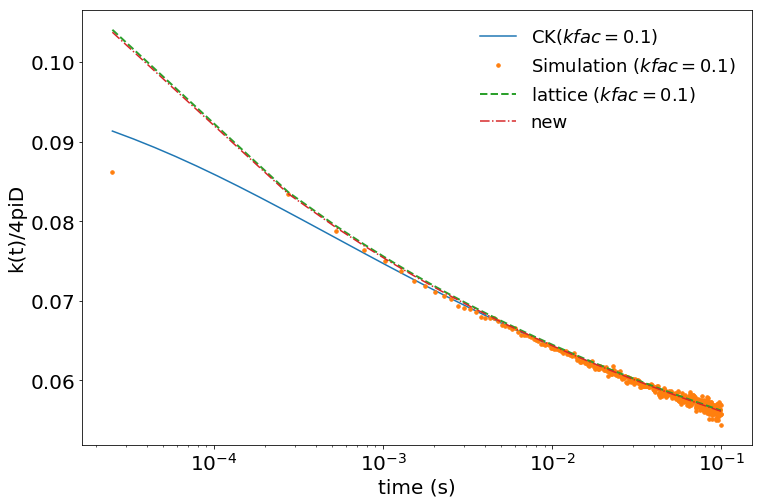

In [9]:
rm = 0.005
factor =1000
L = factor*rm        
Area=L*L
voxelr=rm       
g = 0.5772156649
Na=1000
Nb=1000
D=1
R=2*rm
print(Na*2/Area)
kd= 4.0*math.pi*D
td =(2*voxelr)**2/(4*D)
print('100td',100*td)
#print(48*D*1e-2/(2*voxelr)**2)
C=R/D**0.5
kz = lambda z: 2*np.pi*D*complex(z)**0.5*C*special.kv(1,C*(complex(z)**0.5))/complex(z)/special.kv(0,C*(complex(z)**0.5))

def invlt(kaf,t):    #inverse laplace transform of k(z)
    ka=kaf*kd  
    mp.dps = 15;
    fp= lambda z: ka/(complex(z)+ka/kz(z))
    t = mp.convert(t)
    #print t
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

def ktl(kaf,t): #lattice kt for long time
    ka = kaf*kd
    Pa=ka*(2*sqrt(2)+4*sqrt(3)+3*sqrt(6)+sqrt(22))**2/(72*(6*sqrt(2)+4*sqrt(3)+3*sqrt(6)))/D
    g = 0.5772156649
    print('Pa ori',Pa)
    f=12*4*D*t/(voxelr*2)**2
    A=np.log(f)+(1./Pa-1)*2*math.pi/sqrt(3)
    t3=4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)
    return t3   

def ktl2(kaf,t): #lattice kt for long time
    ka = kaf*kd
    g=0.57721566
    K=ka/2/math.pi/D
    f=1.021
    Pa= 1./(1+(sqrt(3)/2/pi)*(math.log(f*f/12)+(2/K)-2*g))    
    print('Pa new',Pa)
    #Pa=ka*(2*sqrt(2)+4*sqrt(3)+3*sqrt(6)+sqrt(22))**2/(72*(6*sqrt(2)+4*sqrt(3)+3*sqrt(6)))/D
    g = 0.5772156649
    f=12*4*D*t/((f*voxelr)*2)**2
    A=np.log(f)+(1./Pa-1)*2*math.pi/sqrt(3)
    t3=4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)
    return t3  

def ktc(kaf,t): #kt CK for long time
    ka=kaf*kd  
    C=4*D*t/(2*rm)**2
    A=np.log(C)+4*math.pi*D/ka-2*g
    t3=4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)#+0.25/A**4)
    return t3

def calk(stsim,t,C): #get kt from st
    dst = (stsim[2:]-stsim[:-2])/(t[2:]-t[:-2])
    dst=np.append((stsim[1]-stsim[0])/(t[1]-t[0]),dst)
    dst=np.append(dst,(stsim[-1]-stsim[-2])/(t[-1]-t[-2])  )
    return dst/stsim/-C

error = lambda x,y: (x-y)*100/x

def plotk(dat,k_factor):    
    print('kfactor='+str(k_factor))
    #w = spatiocyte.SpatiocyteWorld(ones()*L,voxelr)
    #Ar = w.calculate_volume(ones()*L,voxelr)
    Cb=Nb/Area
    #print('Aactual',Ar,'A',Area)               
    ds=10
    tkt=dat[:,0][::ds]
    mnac=dat[:,1][::ds]
    stsim = mnac/Na
    ksim = calk(stsim,tkt,Cb)
    tt=np.logspace(math.log10(tkt[0]),math.log10(tkt[-1]),30)
    ktck = np.array([invlt(k_factor,t) for t in tt]) #from inverse LT
    ktca=ktc(k_factor,tkt)

#graphs
    lw=2
    fs=20
    ms=12
    ax1.plot(tt,ktck/kd,'-',label='CK($kfac=$'+str(k_factor)+')')
    ax1.plot(tkt,ksim/kd,'.',label='Simulation ($kfac=$'+str(k_factor)+')',markersize=ms-5)
    ax1.plot(tkt,ktl(k_factor,tkt)/kd,'--',label='lattice ($kfac=$'+str(k_factor)+')',markersize=5,linewidth=lw)
    ax1.semilogx(tkt,ktl2(k_factor,tkt)/kd,'-.',label='new')
    #ax1.semilogx(tkt,ktca/kd,'-.',label='CK long-time ($kfac=$'+str(k_factor)+')',markersize=5,linewidth=lw)
    
    ax1.set_ylabel('k(t)/4piD',fontsize=fs)
    ax1.set_xlabel('time (s)',fontsize=fs)
    ax1.tick_params(labelsize=fs)      
    ax1.legend(loc='best',fontsize=fs-2,frameon=False)
    #ax1.set_xlim(ts[0],ts[1])           
    #ax2.plot(tkt,stck,'-')
    #ax2.plot(tkt,stsim,'.')
    
fig1,ax1=plt.subplots(1,1,figsize=(12,8))
#fig2,ax2=plt.subplots(1,1,figsize=(12,8))
#ax1.loglog([100*td]*10,np.linspace(0.05,0.5,10),'--',label='100td')
#ax1.set_ylim(0.05,0.5)
kfac=0.1
dat = np.loadtxt('/home/chew/outputdata/2DRD_kfac'+str(kfac)+'_1000_10000',delimiter=',')
plotk(dat,kfac)

#kfac=10
#dat = np.loadtxt('/home/chew/outputdata/2DRD_kfac'+str(kfac)+'_1000_10000',delimiter=',')
#plotk(dat,kfac)

kfactor=0.01
Pa ori 0.03642521414769726
Pa new 0.03626517089390927


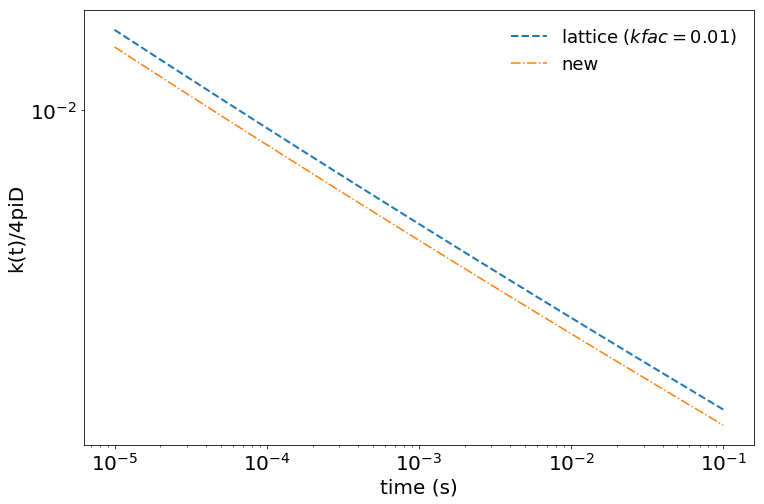

In [29]:
k_factor= 0.01
print('kfactor='+str(k_factor))
#graphs
lw=2
fs=20
ms=12
fig1,ax1=plt.subplots(1,1,figsize=(12,8))
tkt=np.logspace(-5,-1,50)
ax1.loglog(tkt,ktl(k_factor,tkt)/kd,'--',label='lattice ($kfac=$'+str(k_factor)+')',markersize=5,linewidth=lw)
ax1.loglog(tkt,ktl2(k_factor,tkt)/kd,'-.',label='new')

ax1.set_ylabel('k(t)/4piD',fontsize=fs)
ax1.set_xlabel('time (s)',fontsize=fs)
ax1.tick_params(labelsize=fs)      
ax1.legend(loc='best',fontsize=fs-2,frameon=False)


kaf 100
ap1 1.1722492705808119
ap2 1.2115731647673398
ap3 1.2921167430404719


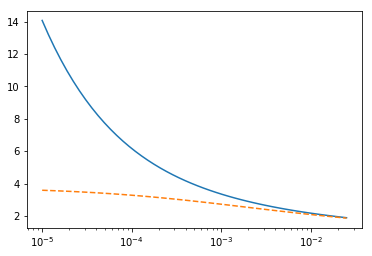

In [14]:
rm=0.005
R=2*rm
D=1
C=R/D**0.5
g = 0.5772156649
voxelr=rm
kd=4*pi*D
td =(2*voxelr)**2/(4*D)
kz = lambda z: 2*np.pi*D*complex(z)**0.5*C*special.kv(1,C*(complex(z)**0.5))/complex(z)/special.kv(0,C*(complex(z)**0.5))

def invlt(kaf,t):    
    ka=kaf*kd  
    fp= lambda z: ka/(complex(z)+ka/kz(z))
    t = mp.convert(t)
    #print t
    mp.dps = 15;
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

def ktl(kaf,t):
    ka = kaf*kd
    Pa=ka/(2*sqrt(3)*D)
    #Pa=ka*(2*sqrt(2)+4*sqrt(3)+3*sqrt(6)+sqrt(22))**2/(72*(6*sqrt(2)+4*sqrt(3)+3*sqrt(6)))/D
    g = 0.5772156649
    f=12*4*D*t/(voxelr*2)**2
    A=np.log(f)+(1./Pa-1)*2*math.pi/math.sqrt(3)
    t3=4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)
    return t3   

def ktc(kaf,t):
    ka=kaf*kd  
    print('ka',ka,kd)
    C=4*D*t/(2*rm)**2
    A=np.log(C)+4*math.pi*D/ka-2*g
    t3=4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)#+0.25/A**4)
    return t3

def ktap1(kaf,t): #smoluchowski b.c. Szabo's
    k0=kaf*kd
    C=D*t/(2*rm)**2
    return 2*math.pi*D/(np.log(np.sqrt(4*math.exp(-g)*C)+math.exp(5./3)))
    
def ktap2(kaf,t): #kim's
    k0=kaf*kd*2*math.pi
    C=D*t/(2*rm)**2
    return 2*math.pi*D/(np.log(math.exp(1./k0)*np.sqrt(math.pi*C)+1))

def ktap3(kaf,t): #ours
    k0=kaf*kd
    C=D*t/(2*rm)**2
    return 2*math.pi*D/(np.log(np.sqrt(4*math.exp(4*math.pi*D/k0-g)*C)+math.exp(5./3)))

def diff(a,b):
    return (a-b)*100/a
    
#time=np.linspace(1e-5,0.05,1000)
time=np.logspace(-5,math.log10(td*1000),50)
for kaf in [100]:
    print('kaf',kaf)
    ktck = [invlt(kaf,t) for t in time]
    ap1=ktap1(kaf,time)
    print('ap1',diff(ktck[-1],ap1[-1]))
    ap2=ktap2(kaf,time)
    print('ap2',diff(ktck[-1],ap2[-1]))    
    ap3=ktap3(kaf,time)
    print('ap3',diff(ktck[-1],ap3[-1]))        
    #ktcka = ktc(kaf,time)
    #ktll = ktl(kaf,time)
    #dif=(ktcka-ktll)*100/ktcka
    plt.semilogx(time,ktck,'-',label='k(t)')
    #plt.semilogx(time,ap1,'o',label='k(t)approx szabo')
    #plt.semilogx(time,ap2,'.',label='k(t)approx kim')
    plt.semilogx(time,ap3,'--',label='k(t)approx ours')
    #plt.semilogx(time,ktcka,'.',label='approx')  
    #plt.semilogx(time,ktll,'--',label='latt')
    #plt.legend()
#plt.ylim(0,3)
#print(dif[-1])

(-10.390676997458385, -14.806718909135064)

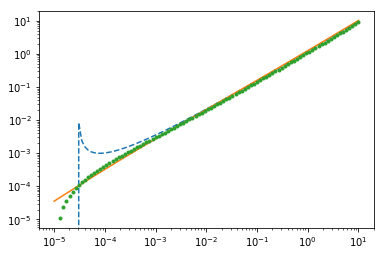

In [15]:
kaf=1
D=1
kd=4*math.pi*D
ka=kaf*kd
rm=0.005
R=2*rm
A=math.exp(5./3)
x=kd/ka-g
CC=D/R/R
B=4*CC*math.exp(x)
C=R/D**0.5
kz = lambda z: 2*np.pi*D*complex(z)**0.5*C*special.kv(1,C*(complex(z)**0.5))/complex(z)/special.kv(0,C*(complex(z)**0.5))

def invlt(kaf,t):    
    ka=kaf*kd  
    fp= lambda z: ka/(complex(z)+ka/kz(z))
    t = mp.convert(t)
    #print t
    mp.dps = 15;
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

def f(t): #ours
    k0=ka
    C=D*t/R/R
    return 2*math.pi*D/(np.log(np.sqrt(4*math.exp(4*math.pi*D/k0-g)*C)+math.exp(5./3)))

def intk1(t):
    return ka*t/(1+ka*np.log(4*D*t/R/R/math.exp(2*g))/kd)

def intk2(t):   
    ln = np.log(A+np.sqrt(B*t))
    return (-4*math.pi*D/B)*(special.expi(2*math.log(A))-A*special.expi(math.log(A))
                             +A*special.expi(ln)-special.expi(2*ln))

def intk3(t):
    return math.pi*R*R*special.expi(np.log(B*t))/math.exp(x)
N=100
t=np.logspace(-5,1,N)
#T=np.linspace(1e-5,1,100)
T=t
ktck = [invlt(kaf,tt) for tt in T]
intk=[np.trapz(ktck[0:i],T[0:i]) for i in range(len(ktck))]
#intk=[integrate.quad(f, 0, xi)[0] for xi in t]
plt.semilogx(t,intk1(t),'--')
plt.loglog(t,intk2(t),'-')
plt.loglog(T,intk,'.')
diff(intk[-1],intk1(t)[-1]),diff(intk[-1],intk2(t)[-1])

In [202]:
math.exp(5./3)

5.29449005047003

In [16]:
3**(1./4)/math.pi**0.5

0.7425152492856911

kfactor=1
Pa 3.642521414769726
Pa 3.642521414769726
Pa 3.642521414769726


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


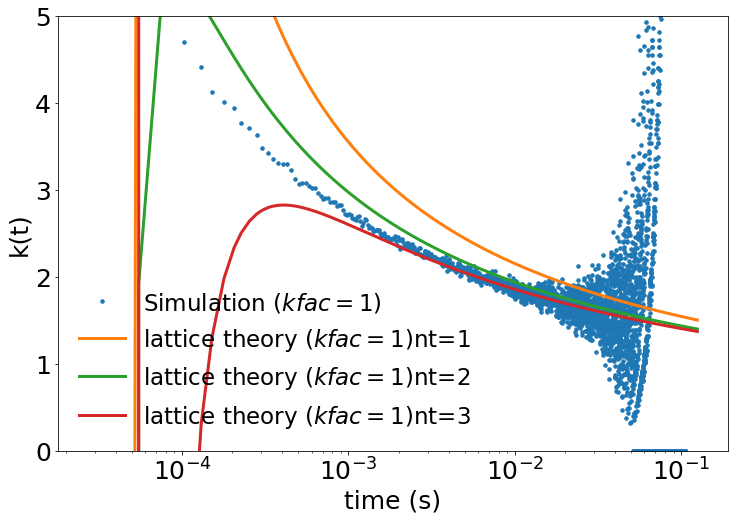

In [30]:
def ktl(kaf,t,nt):
    ka = kaf*kd
    Pa=ka*(2*sqrt(2)+4*sqrt(3)+3*sqrt(6)+sqrt(22))**2/(72*(6*sqrt(2)+4*sqrt(3)+3*sqrt(6)))/D
    print('Pa',Pa)
    g = 0.5772156649
    f=12*4*D*np.exp((1./Pa-1)*2*np.pi/np.sqrt(3))/(voxelr*2)**2
    A=np.log(f*t)
    if nt==1:
        return 4*np.pi*D*(1/A)
    elif nt==2:
        return 4*np.pi*D*(1/A-g/A**2)
    elif nt==3:
        return 4*np.pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3)

def plotk(dat,k_factor,L):    
    print('kfactor='+str(k_factor))
    #w = spatiocyte.SpatiocyteWorld(ones()*L,voxelr)
    #Ar = w.calculate_volume(ones()*L,voxelr)
    Cb=Nb/Area
    #print('Aactual',Ar,'A',Area)               
    tkt=dat[:,0]
    tst=dat[:,0]
    mnac=dat[:,1]
    stsim = mnac/Na
    ksim = calk(stsim,tkt,Cb)

#graphs
    lw=3
    fs=25
    ms=12
    ax1.plot(tkt,ksim,'.',label='Simulation ($kfac=$'+str(k_factor)+')',markersize=ms-5)
    for i in range(3):
        ax1.semilogx(tkt,ktl(k_factor,tkt,i+1),'-',label='lattice theory ($kfac=$'+str(k_factor)+')nt='+str(i+1),markersize=5,linewidth=lw)
    ax1.set_ylim(0,5)
    ax1.set_ylabel('k(t)',fontsize=fs)
    ax1.set_xlabel('time (s)',fontsize=fs)
    ax1.tick_params(labelsize=fs)      
    ax1.legend(loc='best',fontsize=fs-2,frameon=False)
    #ax1.set_xlim(ts[0],ts[1])       
    
fig1,ax1=plt.subplots(1,1,figsize=(12,8))
kfac=1
dat = np.loadtxt('/home/chew/outputdata/2DRD_kfac'+str(kfac)+'_1000_1000_1000',delimiter=',')
plotk(dat,kfac,700*rm)

In [34]:
def ll(d,f):
    return 4*d/(1./f-1)

ll(math.pi/3/2**0.5,0.256318),ll(math.pi/6,0.340537)

(1.020858260154991, 1.0815148461455326)

In [38]:
from math import pi
from math import sqrt
def er(a,b):
    return (a-b)*100/a

for kaf in [0.01,100]:
    R=0.01
    D=1
    kd=4*pi*R*D
    ka=kaf*kd
    keff=ka*kd/(ka+kd)
    d=pi/3/sqrt(2)
    P=ka*d/(pi*D*R)
    F1=0.256318
    keffl=pi*P*D*R*((1/F1-1)/(P+1/F1-1))/d
    print(keff,keffl,er(keff,keffl))

0.0012441951103325916 0.0012439382154126525 0.02064747866356678
0.12441951103325916 0.12190202184022664 2.023387788720337


In [42]:
for kaf in [0.01,100]:
    R=0.01
    D=1
    kd=4*pi*R*D
    ka=kaf*kd
    keff=ka*kd/(ka+kd)
    d=pi/6
    P=ka*d/(pi*D*R)
    F1=0.340537
    keffl=pi*P*D*R*((1/F1-1)/(P+1/F1-1))/d
    print(keff,keffl,er(keff,keffl))

0.0012441951103325916 0.001243191758007014 0.08064268355060708
0.12441951103325916 0.11512780296791023 7.468047405253924


In [31]:
(math.log(1./8)-2*g)/math.pi+1

-0.02937370565359476